## Accident Severity Prediction

Dataset Source : Kaggle
Dataset Link: https://www.kaggle.com/datasets/daveianhickey/2000-16-traffic-flow-england-scotland-wales

Dataset is too large so we are using data of two years from 2012-14, which contains around 4,64,697 records.

## Importing Libraries

In [54]:
import pandas as pd   
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import plotly.express as px
import time
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE,SelectFromModel


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings("ignore") 

### Loading Dataset

In [55]:
data = pd.read_csv("E:/accidents_2012_to_2014.csv")
data.shape

(464697, 33)

## Data Pre Processing

In [56]:
print('Length of Dataset: ', data.shape[0])
print('Number of Attributes: ', data.shape[1])

Length of Dataset:  464697
Number of Attributes:  33


Checking Null Values

In [57]:
data.isnull().sum()

Accident_Index                                      0
Location_Easting_OSGR                               0
Location_Northing_OSGR                              0
Longitude                                           0
Latitude                                            0
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                               13
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

Dropping Null value Columns

In [58]:
data.drop('Junction_Detail',axis=1,inplace=True)
data.drop('Junction_Control',axis=1,inplace=True)
filtered_data = data.dropna()

In [59]:
filtered_data.shape

(435236, 31)

Dropping Irrelavent Features.

In [60]:
filtered_data.drop('Accident_Index',axis=1,inplace=True)
filtered_data.drop('LSOA_of_Accident_Location',axis=1,inplace=True)
filtered_data.drop('Local_Authority_(Highway)',axis=1,inplace=True)
filtered_data.drop('Date',axis=1,inplace=True)
filtered_data.drop('Time',axis=1,inplace=True)

In [61]:
filtered_data.shape

(435236, 26)

### One Hot Encoding

Converting Categorical data into Numbers

In [62]:
df_onehot = pd.get_dummies(filtered_data)
df_onehot.dtypes

Location_Easting_OSGR                                            int64
Location_Northing_OSGR                                           int64
Longitude                                                      float64
Latitude                                                       float64
Police_Force                                                     int64
                                                                ...   
Carriageway_Hazards_None                                         uint8
Carriageway_Hazards_Other object in carriageway                  uint8
Carriageway_Hazards_Pedestrian in carriageway (not injured)      uint8
Did_Police_Officer_Attend_Scene_of_Accident_No                   uint8
Did_Police_Officer_Attend_Scene_of_Accident_Yes                  uint8
Length: 67, dtype: object

### Train Test Split

In [63]:
X = df_onehot.loc[:, df_onehot.columns != 'Accident_Severity']
y = df_onehot[['Accident_Severity']]

In [64]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(304665, 66)
(304665, 1)
(130571, 66)
(130571, 1)


In [65]:
trainX.to_csv("trainX.csv")
testX.to_csv("testX.csv")
testy.to_csv("testy.csv")
trainy.to_csv("trainy.csv")


## Applying Machine Learning Models

### Random Forest Classifier

In [66]:
rf = RandomForestClassifier(max_depth= 4 ,n_estimators = 120)
rf.fit(trainX,trainy.values.ravel())
y_pred = rf.predict(testX)
y_pred_proba = rf.predict_proba(testX)

In [67]:
print("ROC Score:", roc_auc_score(testy,y_pred_proba,multi_class="ovr"))
accuracy = rf.score(trainX, trainy)
print("Accuracy of Random Forest:",accuracy)

ROC Score: 0.6938906595174897
Accuracy of Random Forest: 0.8469597754911132


In [68]:
from sklearn.metrics import classification_report
print(classification_report(testy,y_pred, labels=[1,2,3]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1492
           2       0.00      0.00      0.00     18594
           3       0.85      1.00      0.92    110485

    accuracy                           0.85    130571
   macro avg       0.28      0.33      0.31    130571
weighted avg       0.72      0.85      0.78    130571



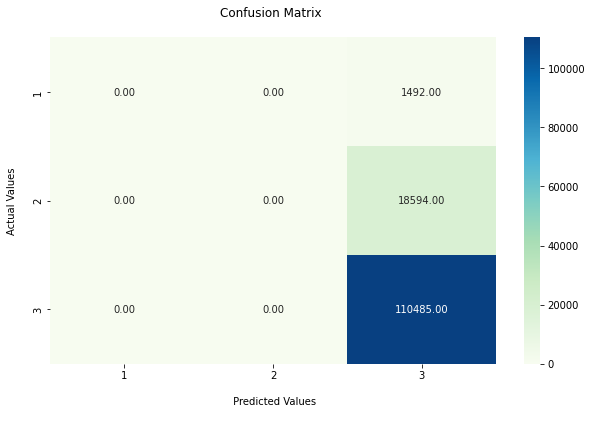

In [69]:
import seaborn as sns
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(testy,y_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['1','2','3'])
fx.yaxis.set_ticklabels(['1','2','3'])
plt.show()

### Decision Tree Classifier

In [70]:
DT = DecisionTreeClassifier(max_depth=200)
DT.fit(trainX,trainy)
y_pred = DT.predict(testX) 

In [71]:
y_pred_proba = DT.predict_proba(testX)

In [72]:
print("ROC Score :" , roc_auc_score(testy,y_pred_proba,multi_class="ovr"))
accuracy = DT.score(trainX, trainy)
print("Accuracy of Decision Tree:",accuracy)
print(classification_report(testy,y_pred, labels=[1,2,3]))

ROC Score : 0.5832909371444646
Accuracy of Decision Tree: 0.9999343541266638
              precision    recall  f1-score   support

           1       0.13      0.15      0.14      1492
           2       0.28      0.30      0.29     18594
           3       0.88      0.86      0.87    110485

    accuracy                           0.77    130571
   macro avg       0.43      0.44      0.43    130571
weighted avg       0.78      0.77      0.78    130571



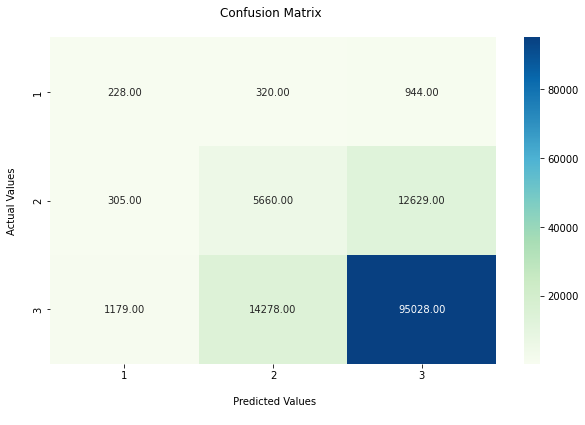

In [73]:
import seaborn as sns
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(testy,y_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['1','2','3'])
fx.yaxis.set_ticklabels(['1','2','3'])
plt.show()

### Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(solver = 'liblinear')
lr.fit(trainX,trainy.values.ravel())
y_pred = lr.predict(testX)
y_pred_proba = lr.predict_proba(testX)

In [75]:
print("ROC Score :" , roc_auc_score(testy,y_pred_proba,multi_class="ovr"))
accuracy = lr.score(trainX, trainy)
print("Accuracy of Logistic Regression:",accuracy)
print(classification_report(testy,y_pred, labels=[1,2,3]))

ROC Score : 0.5632775790906478
Accuracy of Logistic Regression: 0.8469597754911132
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1492
           2       0.00      0.00      0.00     18594
           3       0.85      1.00      0.92    110485

    accuracy                           0.85    130571
   macro avg       0.28      0.33      0.31    130571
weighted avg       0.72      0.85      0.78    130571



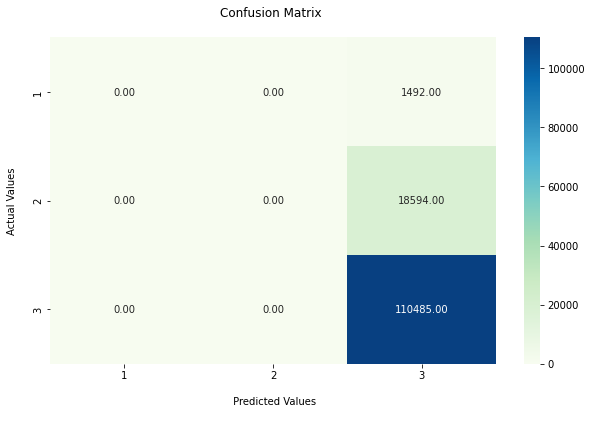

In [76]:
import seaborn as sns
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(testy,y_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['1','2','3'])
fx.yaxis.set_ticklabels(['1','2','3'])
plt.show()